In [2]:
##############################################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
from print_dict import pd as printd
%matplotlib inline

from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False
##############################################################################

def pprint(d, indent=0):
   for key, value in d.items():
      newlen = np.amax([len(k) for k in d.keys()])
      print(' '* indent + str(key).ljust(newlen),end='')
      if isinstance(value, dict):
         pprint(value, indent+4)
      else:
         print(newlen*'-' + str(value))



<IPython.core.display.Javascript object>

# Generating N-sectoral system

we do consider that u=1, i=0 for the moment

## Generating N synchronized Goodwin in parrallel 

We start with N Goodwin with everything in Parrallel BUT the Philips curve. 


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'V', 'epsilonV', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']
NO RUN DONE YET, SYSTEM IS DOING A RUN WITH GIVEN FIELDS

time step 836 / 1000
time step 1000 / 1000


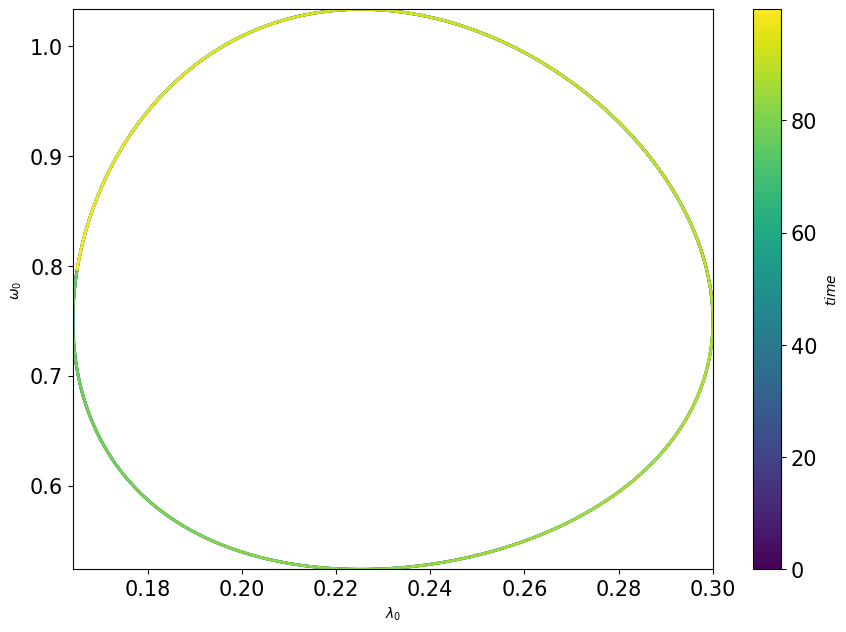

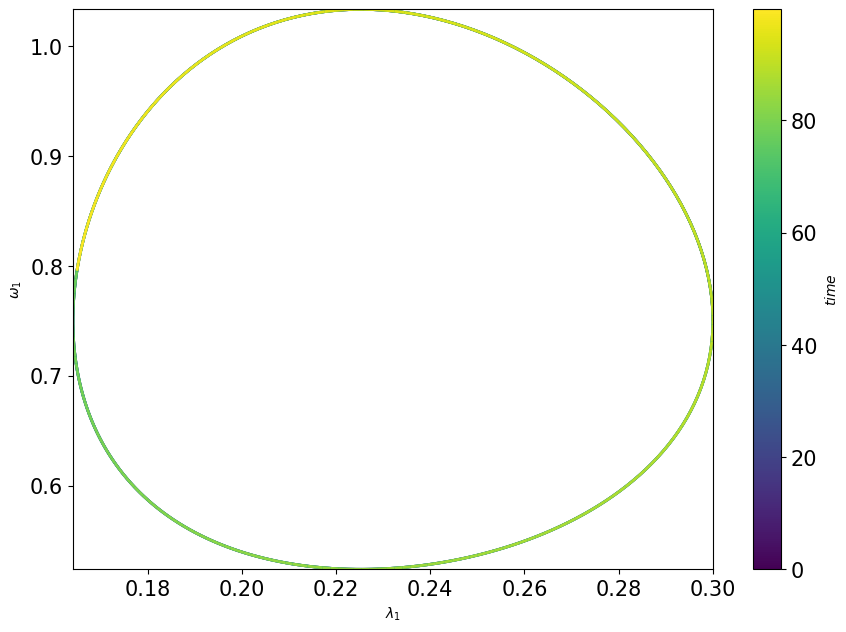

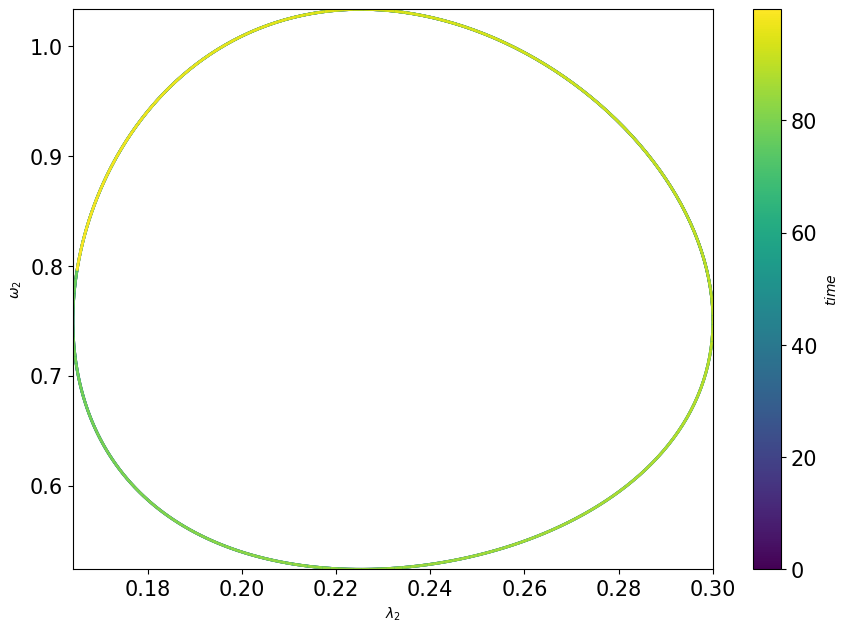


time step 832 / 1000
time step 1000 / 1000


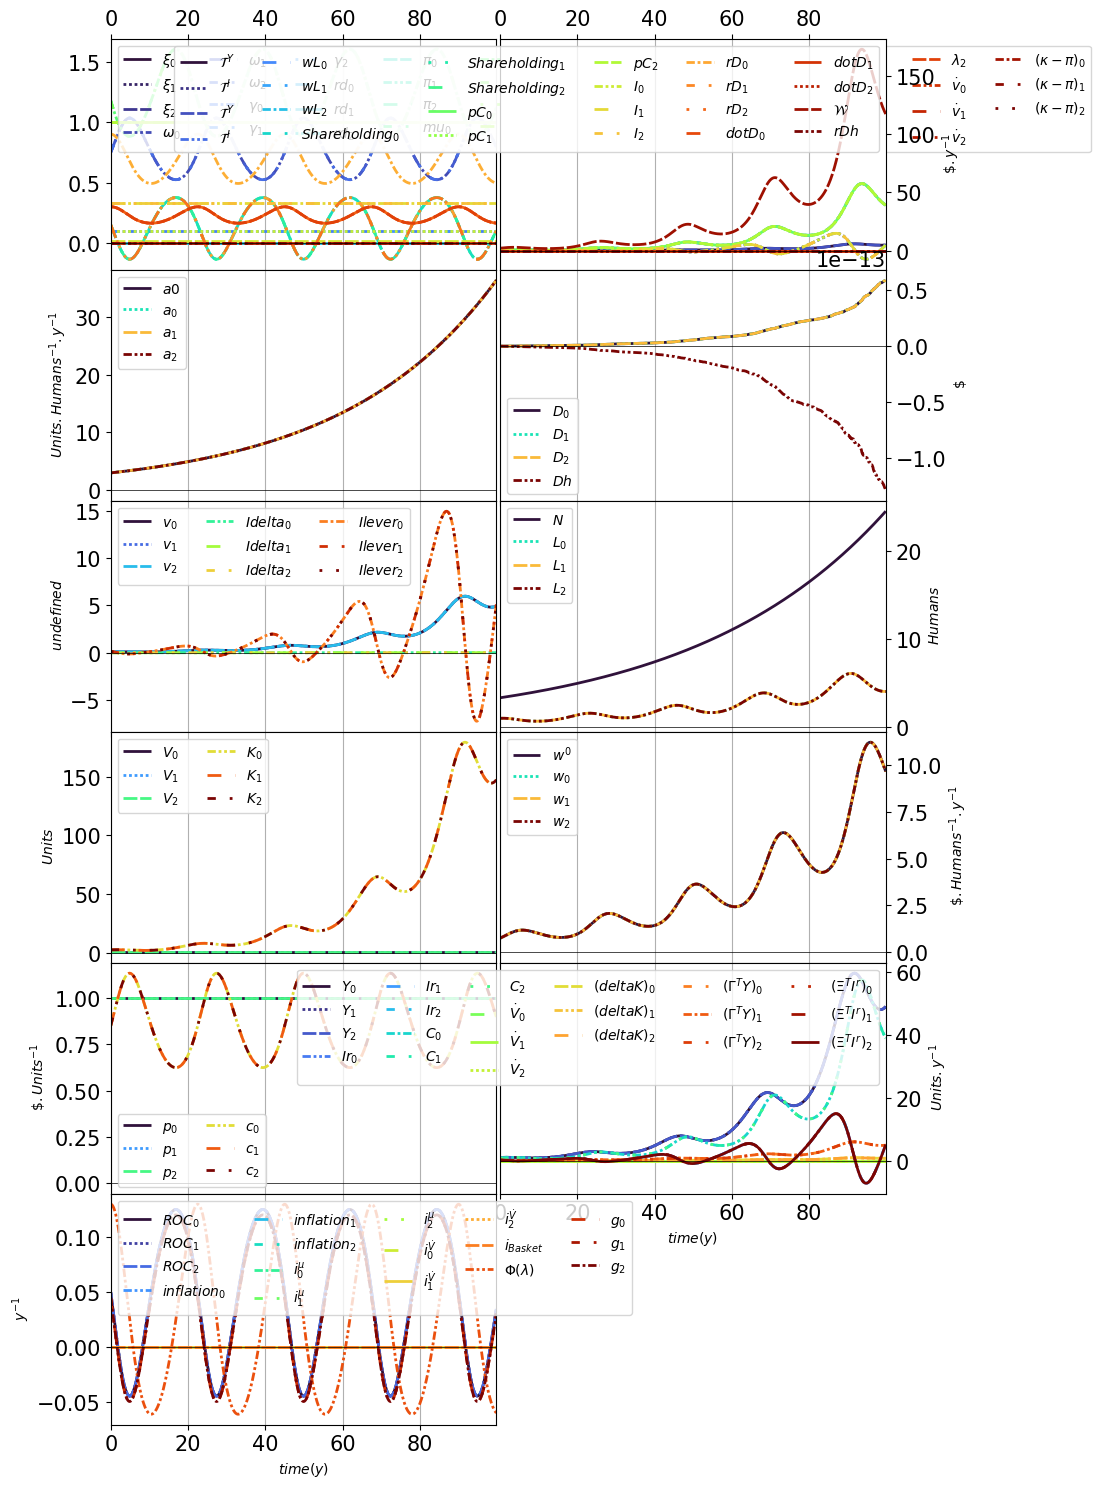

In [4]:
hub=pgm.Hub('CHIMES0',verb=False)

# Generating a basic dictionnary of N sectors 
dparam0 = hub.supplements['generateNgoodwin'](3) 

hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 
#hub.get_summary()

for sect in dparam0['Nprod']:
    pgm.plots.XY(hub,['employment',sect],['omega',sect])

hub.run()
hub.plot()

### Forcing them to be at equilibrium


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'V', 'epsilonV', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 793 / 1000
time step 1000 / 1000


C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:204: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


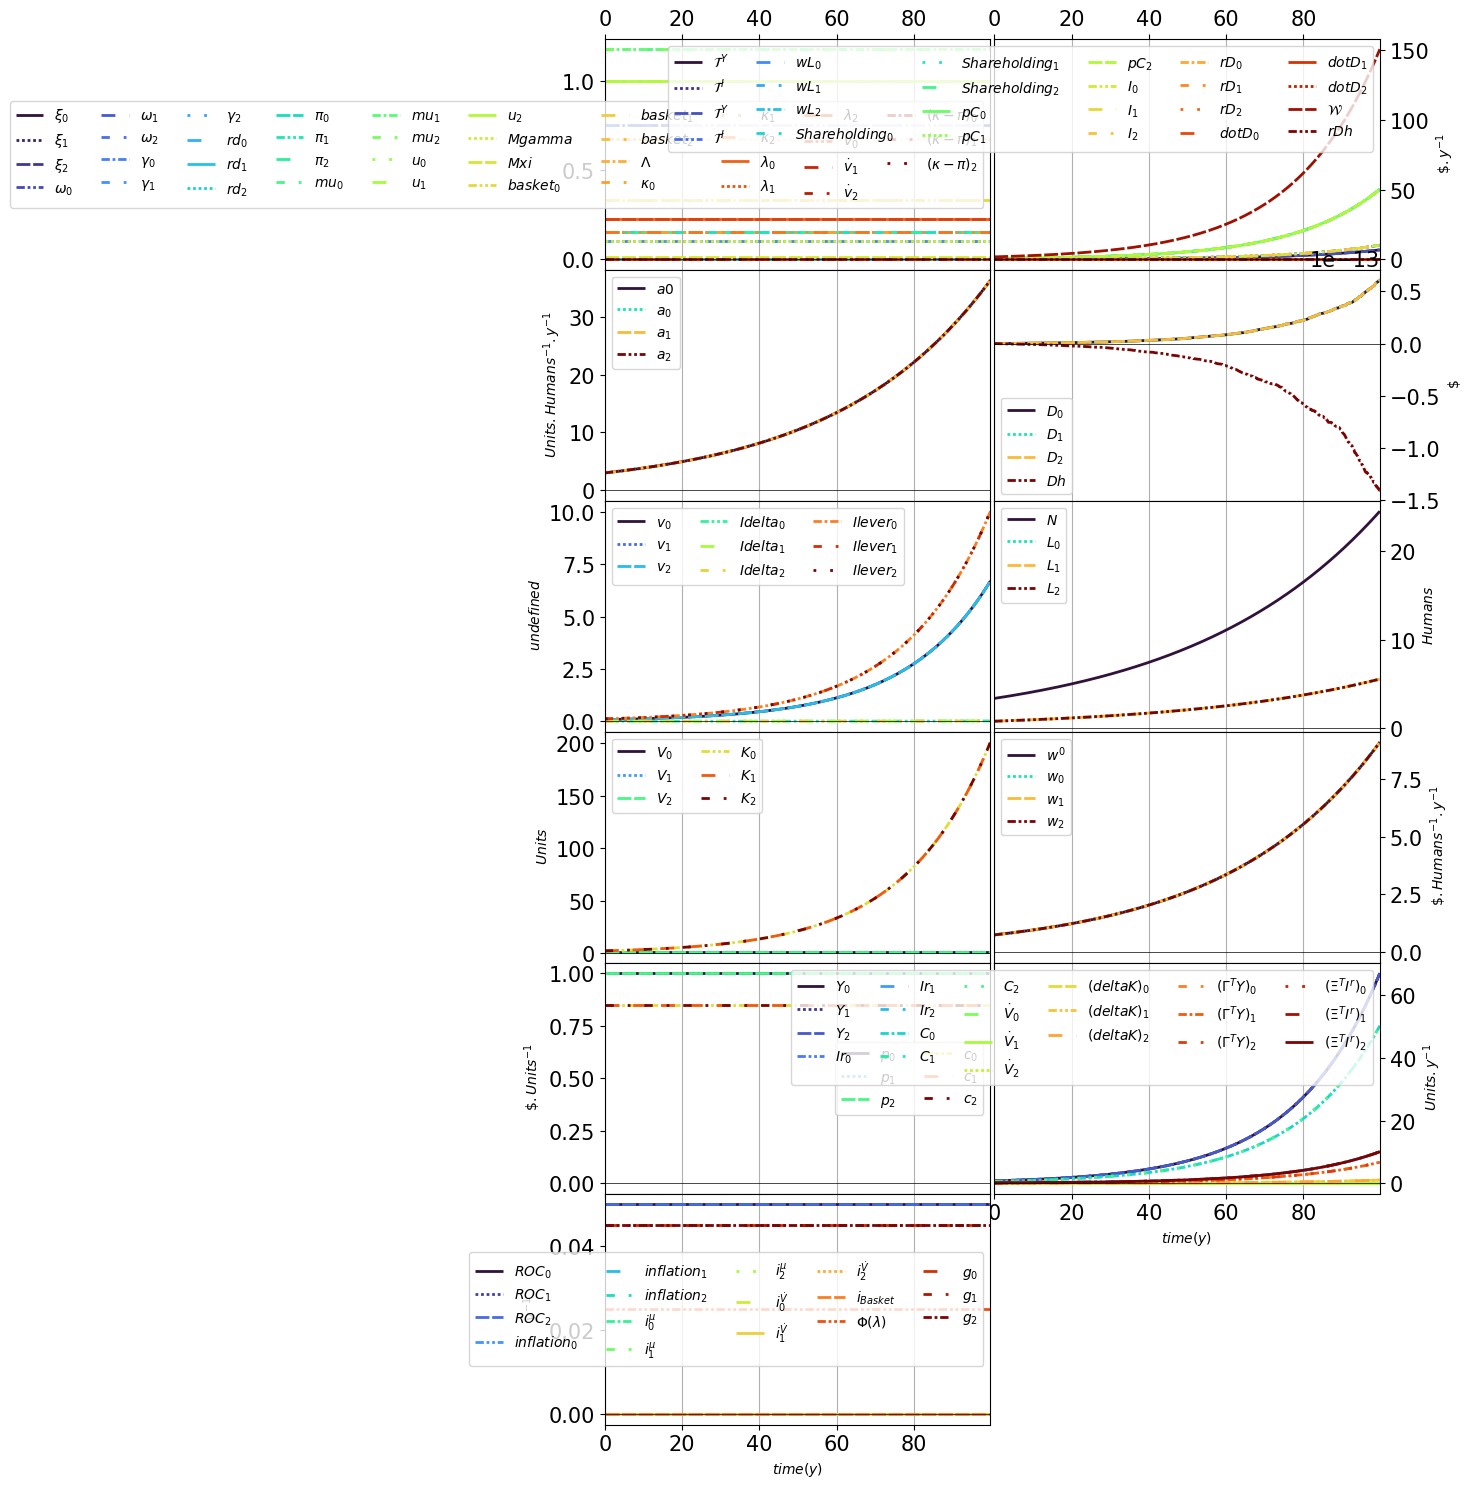

In [5]:
## At equilibrium
hub=pgm.Hub('CHIMES0',verb=False)

# Generating a basic dictionnary of N sectors 
dparam0 = hub.supplements['generateNgoodwin'](3) 

# FORCING THE EQUILIBRIUM 
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth

K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N

hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 
#hub.get_summary()


hub.run()
hub.plot()

### Desynchronized Goodwin 


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'V', 'epsilonV', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 800 / 10000
time step 1618 / 10000
time step 2403 / 10000
time step 3177 / 10000
time step 3967 / 10000
time step 4765 / 10000
time step 5558 / 10000
time step 6339 / 10000
time step 7130 / 10000
time step 7963 / 10000
time step 8754 / 10000
time step 9552 / 10000
time step 10000 / 10000


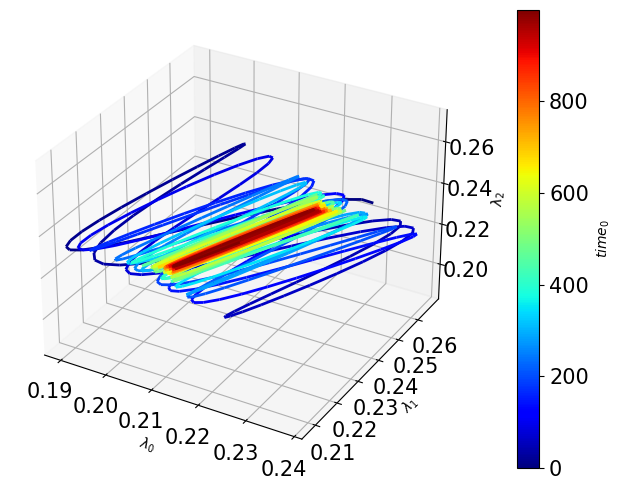

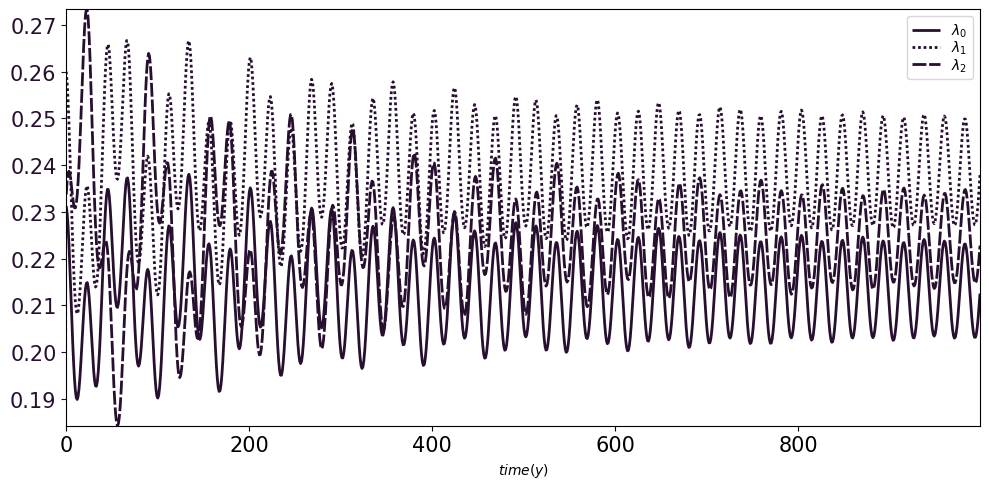

In [8]:
## At equilibrium
hub=pgm.Hub('CHIMES0',verb=False)

# Generating a basic dictionnary of N sectors 
dparam0 = hub.supplements['generateNgoodwin'](3) 

# FORCING THE EQUILIBRIUM 
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth

K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']
#pprint(dparam0)

# DESYNCHRONISATION 
noise = np.random.normal(1,0.2,size=len(dparam0['Nprod']))
dparam0['K']*= noise

noise2 = np.random.normal(1,0.1,size=len(dparam0['Nprod']))
dparam0['p']*= noise2 

dparam0['Cpond']=noise/(len(dparam0['Nprod']))
dparam0['Cpond']/=np.sum(dparam0['Cpond'])

hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',1000,verb=False) 

hub.run(N=1000)
'''
for sector in dparam0['Nprod']:
    pgm.plots.XYZ(hub,['omega',sector],
                      ['employment',sector],
                      ['rd',sector],
                      ['dotV',sector] )


pgm.plots.XYZ(hub,['omega',dparam0['Nprod'][0]],
                    ['omega',dparam0['Nprod'][1]],
                    ['omega',dparam0['Nprod'][2]],
                    'time' )
'''
pgm.plots.XYZ(hub,['employment',dparam0['Nprod'][0]],
                    ['employment',dparam0['Nprod'][1]],
                    ['employment',dparam0['Nprod'][2]],
                    'time' )


pgm.plots.plotnyaxis(hub,[[['employment',dparam0['Nprod'][0]],
                          ['employment',dparam0['Nprod'][1]],
                          ['employment',dparam0['Nprod'][2]]]])
#hub.supplements['PiRepartition'](hub)

## Random matrices at equilibrium

We determine randomly :
* the content of the intermediate consumption matrix $\Gamma$
* the content of the capital composition matrix $\Xi$
* the structure of the consumption vector $C^{pond}$ (summing to 1)
* the local wage ponderation $w$
* the local productivity per worker $a$


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'V', 'epsilonV', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 804 / 1000
time step 1000 / 1000


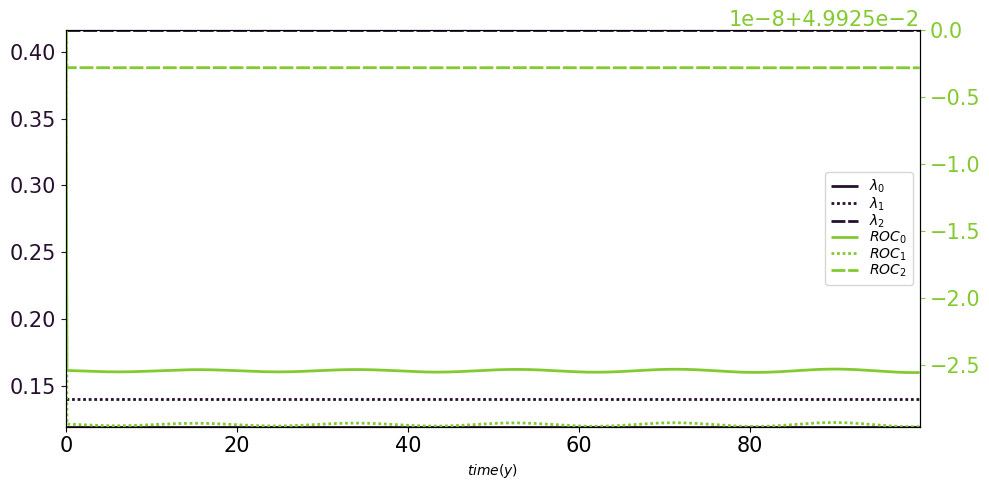

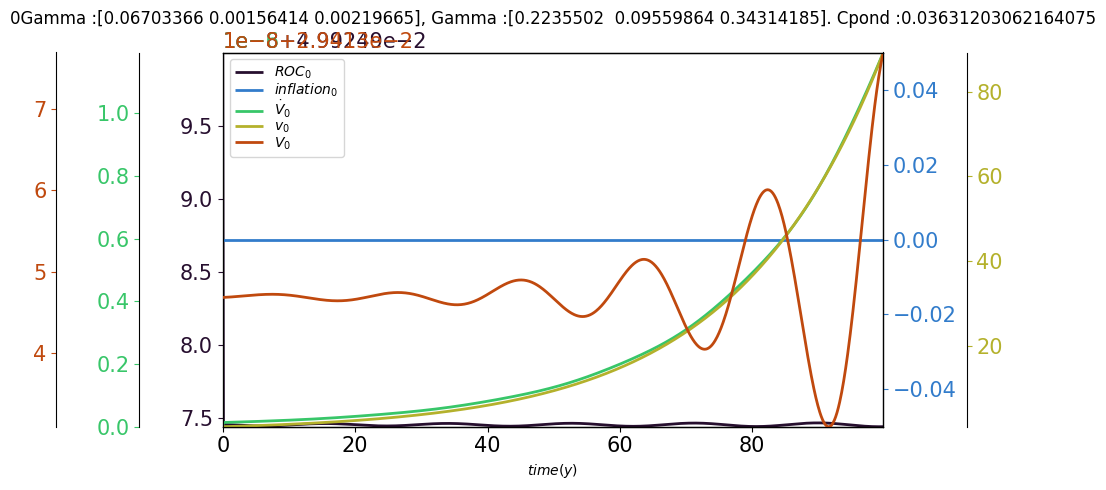

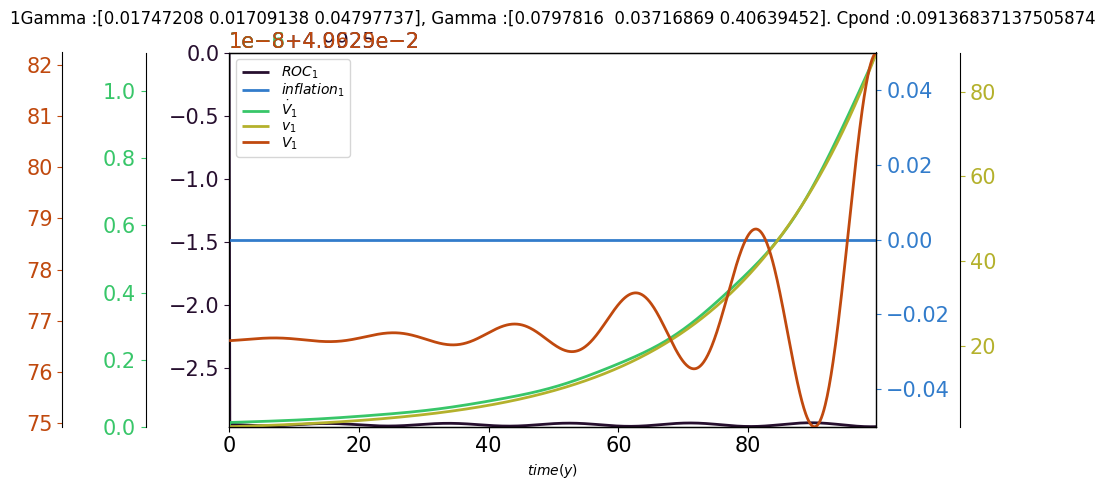

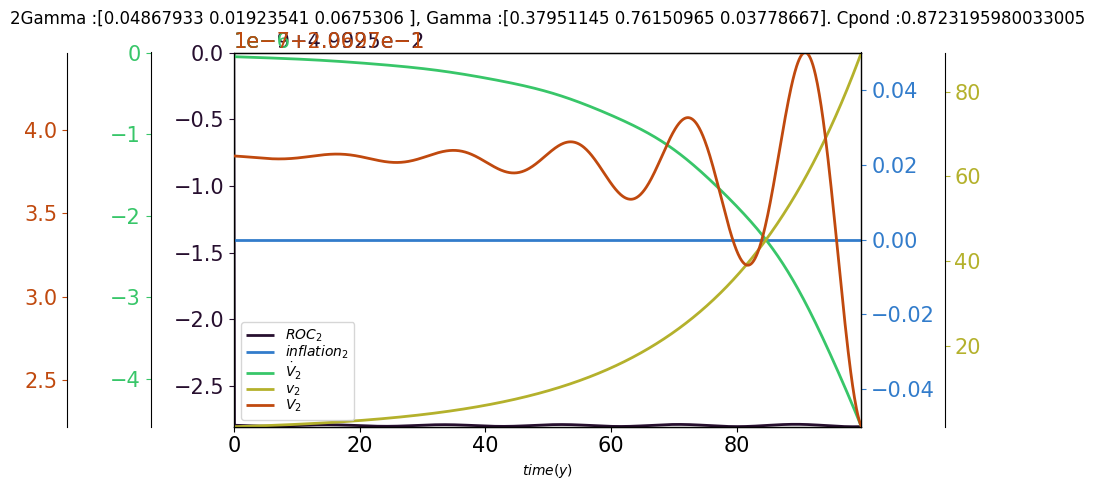

In [18]:

hub=pgm.Hub('CHIMES0',verb=False)

########################################################
Nsect       = 3     # Number of sectors

gamma0      = 0.1   # Mean intermediate consumption
sigmagamma  = .5    # standard deviation on intermediate consumption

xi0         = 1     # Mean capital size 
sigmaxi     = .5    # standard deviation on capital size

apondscale = .3
wpondscale = .3
########################################################

### GENERATION #########################################
dparam0 = hub.supplements['generateNgoodwin'](Nsect) #Basic N Goodwin dictionnary 

# vector equivalent for wage and productivity 
dparam0['apond'] = np.random.normal(1,scale=apondscale,size=Nsect)
dparam0['z']     = np.random.normal(1,scale=wpondscale,size=Nsect)

dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']

### MATRICES AND CONSUMPTION VECTOR (HERE RANDOM) ######
dparam0['Gamma'] = np.random.lognormal(size=(Nsect,Nsect))   
dparam0['Gamma']*= gamma0/np.sum(dparam0['Gamma'],axis=1)[:, np.newaxis]
dparam0['Gamma']*= (1+np.random.normal(scale=sigmagamma,size=Nsect ))[:, np.newaxis]

dparam0['Xi'] = np.random.lognormal(size=(Nsect,Nsect)) 
dparam0['Xi']*= xi0/np.sum(dparam0['Xi'],axis=1)[:, np.newaxis]
dparam0['Xi']*= (1+np.random.normal(scale=sigmaxi,size=Nsect ))[:, np.newaxis]

dparam0['Cpond'] = np.random.lognormal(size=Nsect) 
dparam0['Cpond']/= np.sum(dparam0['Cpond'])

########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
#dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']


# RUN AND PLOT ######################################## 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 

hub.run()

pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                          ])
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])

for i,sect in enumerate(dparam0['Nprod']):
    title = sect +f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','v','V']],title=title)#,tend=20)

pgm.plots.Sankey(hub)


## Same with fixed values


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'V', 'epsilonV', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['Consumption', 'Intermediate', 'Investment']

time step 728 / 1000
time step 1000 / 1000


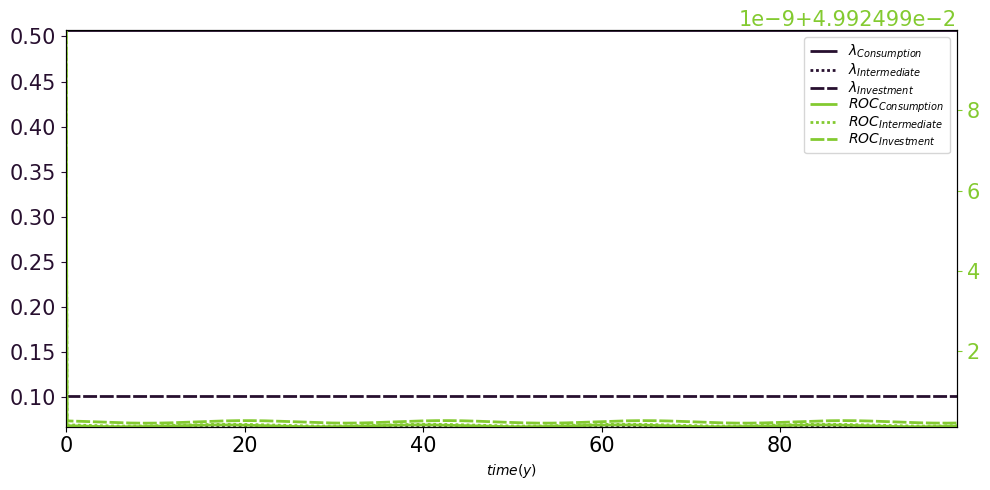

0 Consumption


C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:281: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



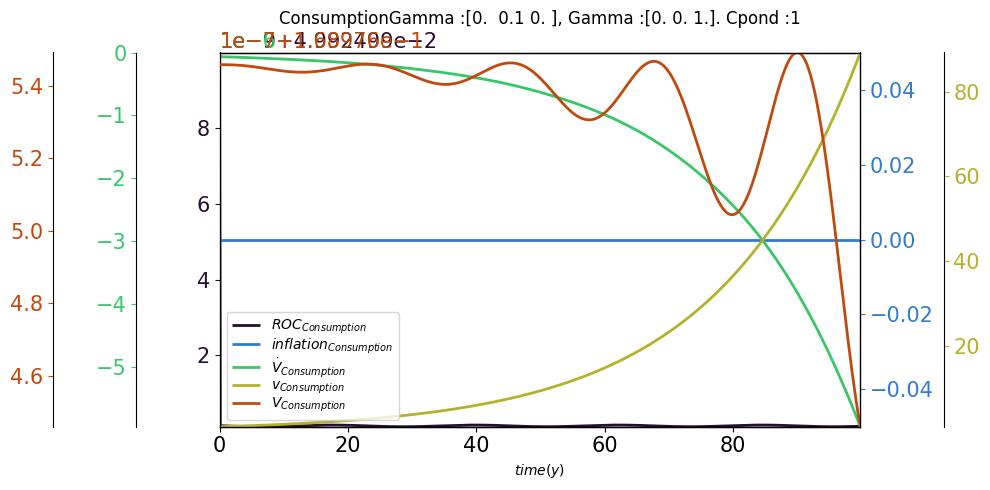

1 Intermediate


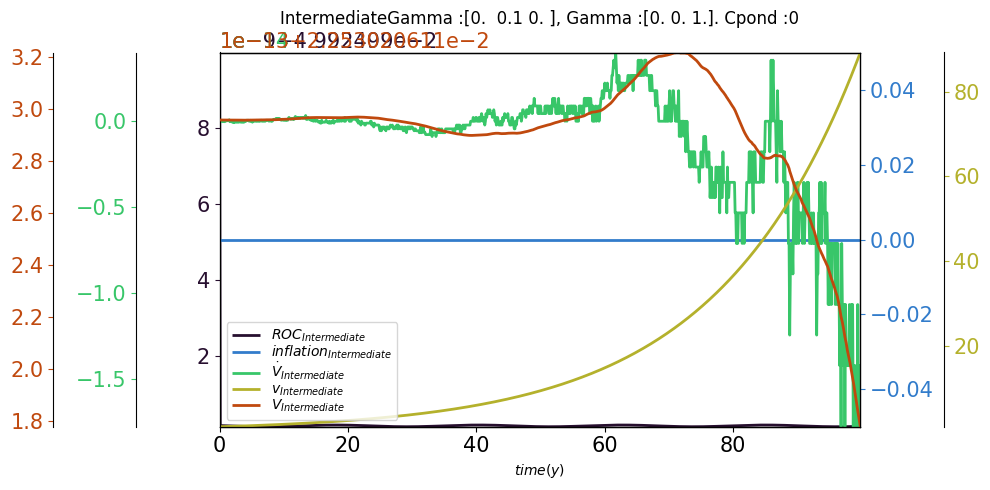

2 Investment


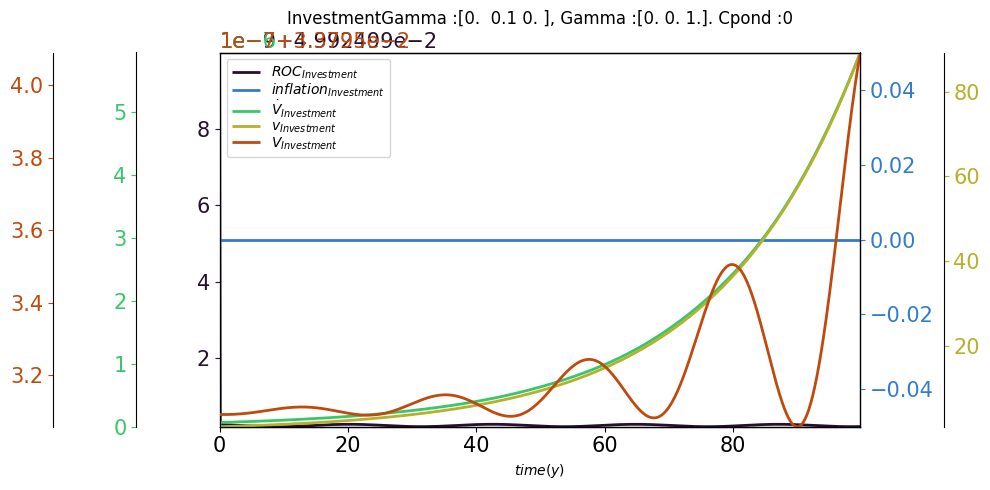

In [19]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption','Intermediate','Investment']
dparam0['Gamma']= np.array([[0. ,0.1,0],
                            [0. ,0.1,0],
                            [0. ,0.1,0]])
dparam0['Xi']   = np.array([[0. ,0. ,1],
                            [0. ,0. ,1],
                            [0. ,0. ,1]])
dparam0['Cpond'] = np.array([1,0,0])


########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
#dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']


# RUN AND PLOT ######################################## 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 

hub.run()

pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                          ])
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])

for i,sect in enumerate(dparam0['Nprod']):
    print(i,sect)
    title = sect 
    title+=f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','v','V']],title=title)#,tend=20)

#hub.plot()
#hub.supplements['PiRepartition'](hub)
#hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
pgm.plots.Sankey(hub)



## STABILIZING THE SYSTEM 


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'V', 'epsilonV', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['chi', 'A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['Consumption', 'Intermediate', 'Investment']

time step 741 / 1000
time step 1000 / 1000


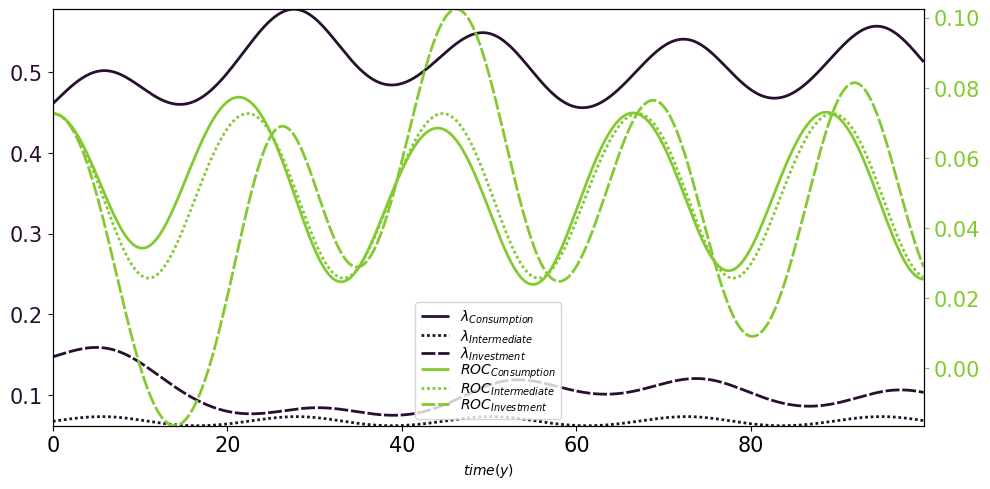

0 Consumption


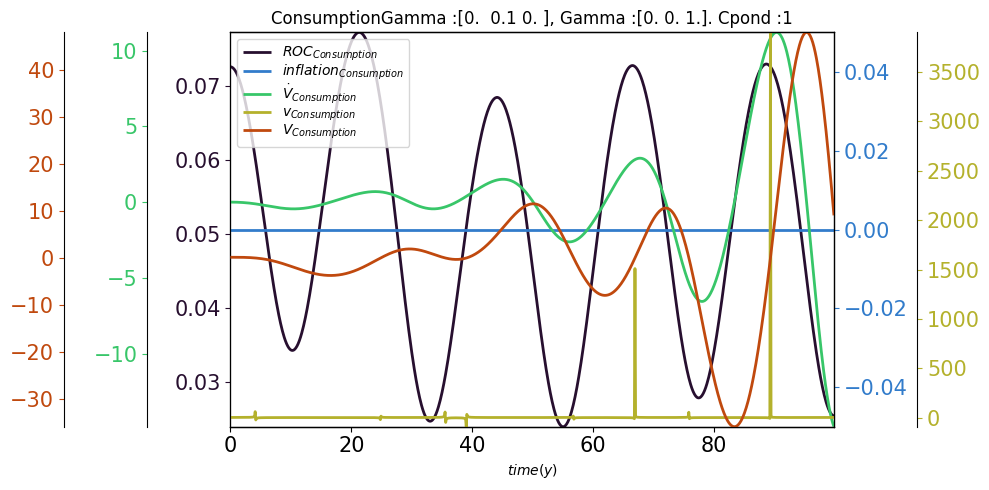

1 Intermediate


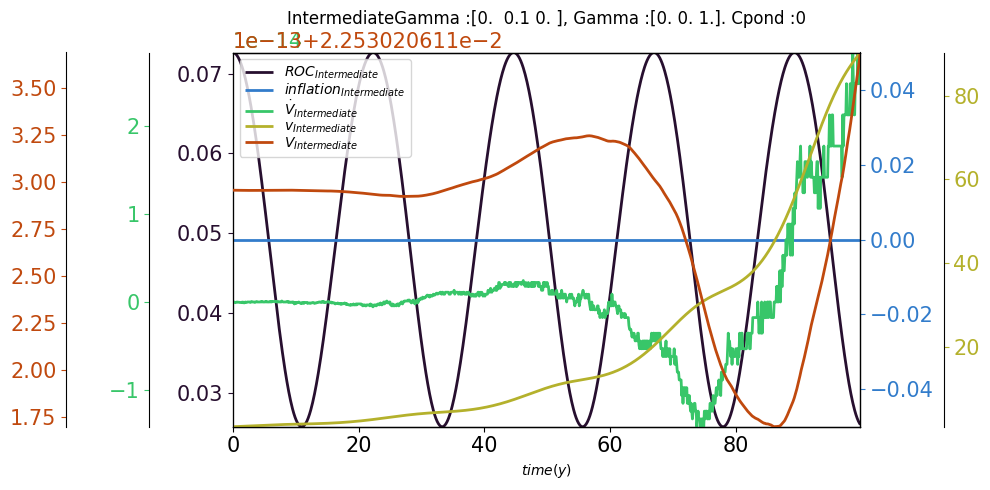

2 Investment


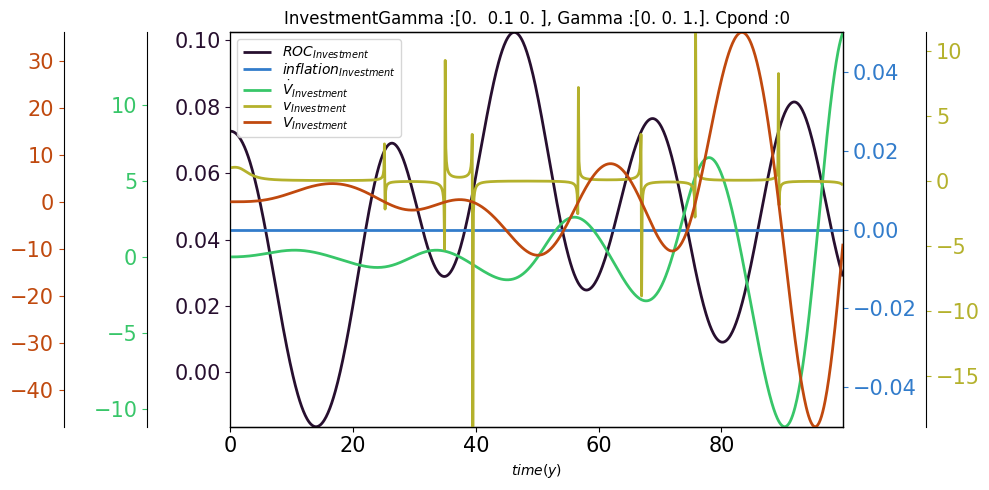

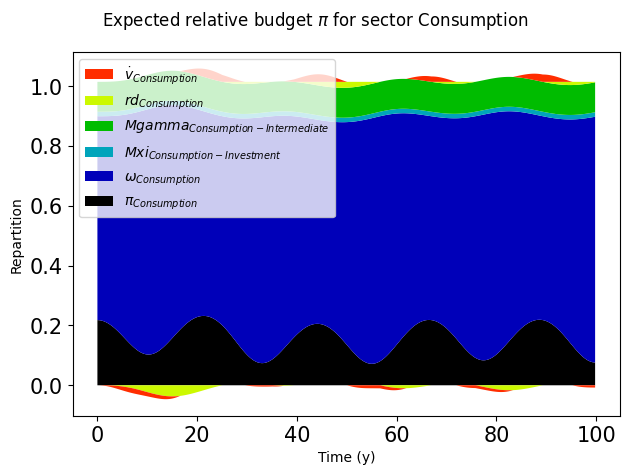

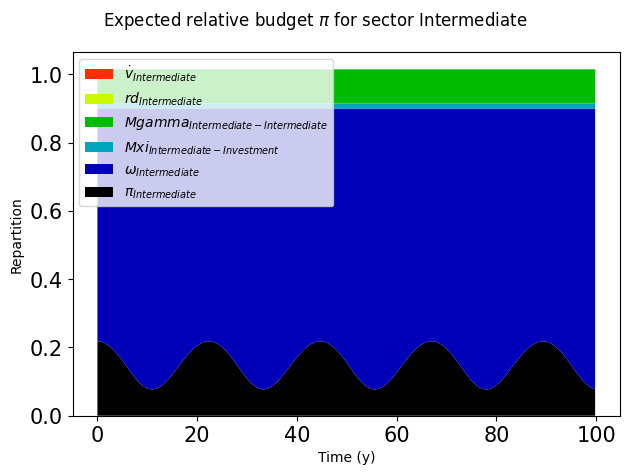

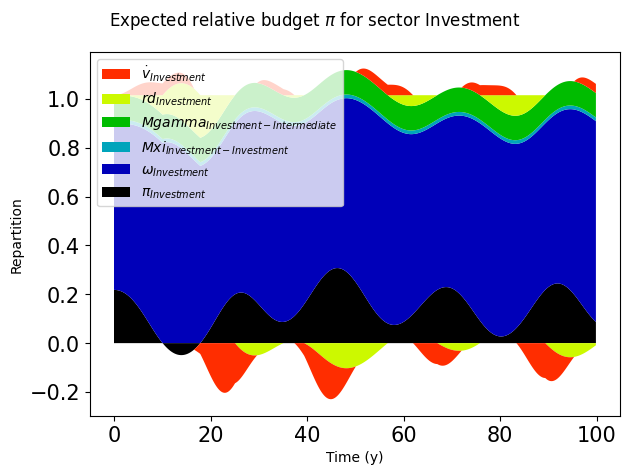

In [23]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption','Intermediate','Investment']
dparam0['Gamma']= np.array([[0. ,0.1,0],
                            [0. ,0.1,0],
                            [0. ,0.1,0]])
dparam0['Xi']   = np.array([[0. ,0. ,1],
                            [0. ,0. ,1],
                            [0. ,0. ,1]])
dparam0['Cpond'] = np.array([1,0,0])


########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']


# RUN AND PLOT ######################################## 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 

hub.run()

pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                         #[['pi',sect] for sect in dparam0['Nprod']],  
                          ])
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])

for i,sect in enumerate(dparam0['Nprod']):
    print(i,sect)
    title = sect 
    title+=f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','v','V']],title=title)#,tend=20)

#hub.plot()
hub.supplements['PiRepartition'](hub)
#hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
pgm.plots.Sankey(hub)




Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'V', 'epsilonV', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'A', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'chiV']
Changes Ignored:['chi', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['Consumption', 'Intermediate', 'Investment']
Identified chiV as a value change on all axes

Changing Dimensions: ['dt']

time step 585 / 10000
time step 1191 / 10000
time step 1775 / 10000
time step 2377 / 10000
time step 2947 / 10000
time step 3565 / 10000
time step 4215 / 10000
time step 4808 / 10000


C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Components\_model_CESprod.py:34: RuntimeWarning:

invalid value encountered in power

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Components\_model_CESprod.py:47: RuntimeWarning:

divide by zero encountered in power

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Components\_model_CESprod.py:50: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\CHIMES\_model_CHIMES0.py:93: RuntimeWarning:

invalid value encountered in multiply



time step 5414 / 10000
time step 6006 / 10000
time step 6611 / 10000
time step 7195 / 10000
time step 7791 / 10000
time step 8384 / 10000
time step 8985 / 10000
time step 9578 / 10000
time step 10000 / 10000


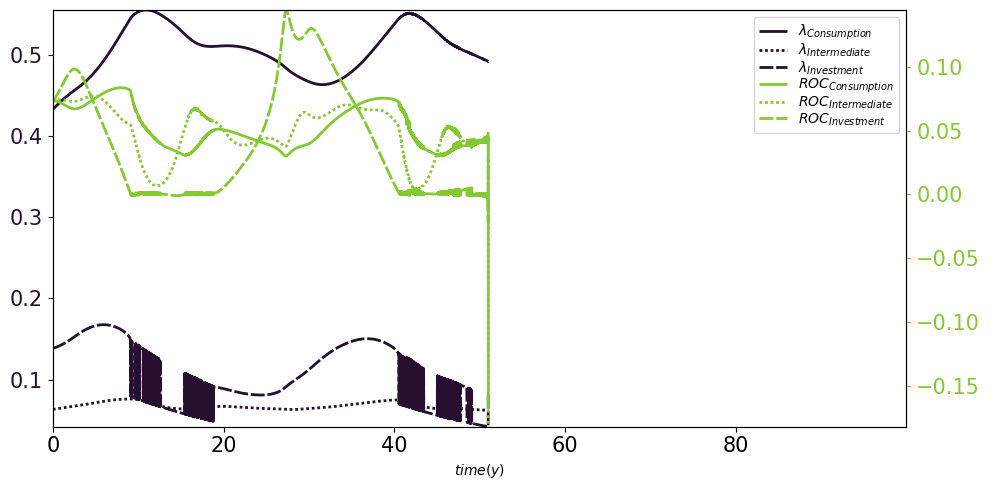

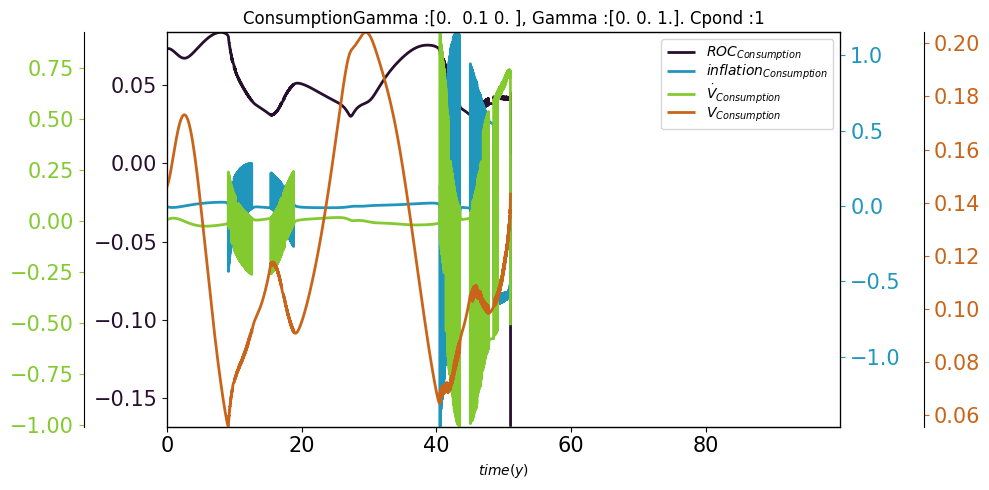

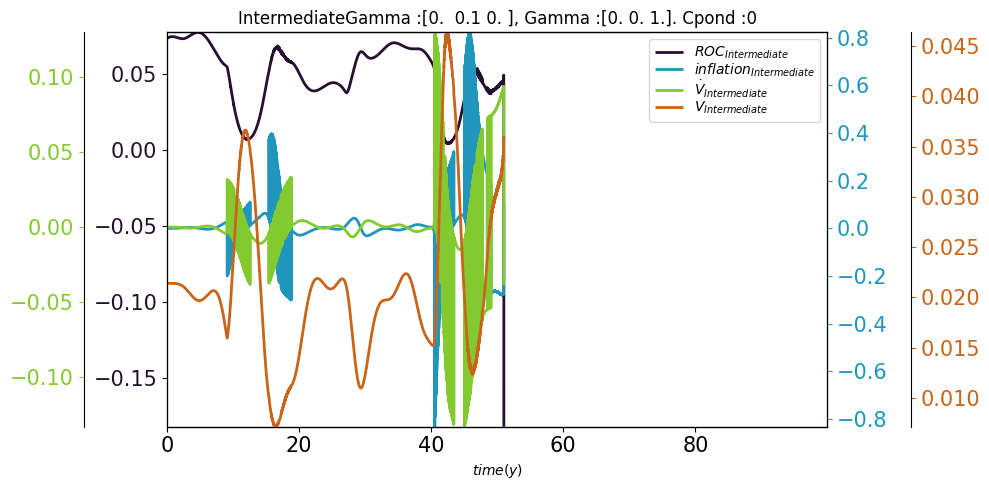

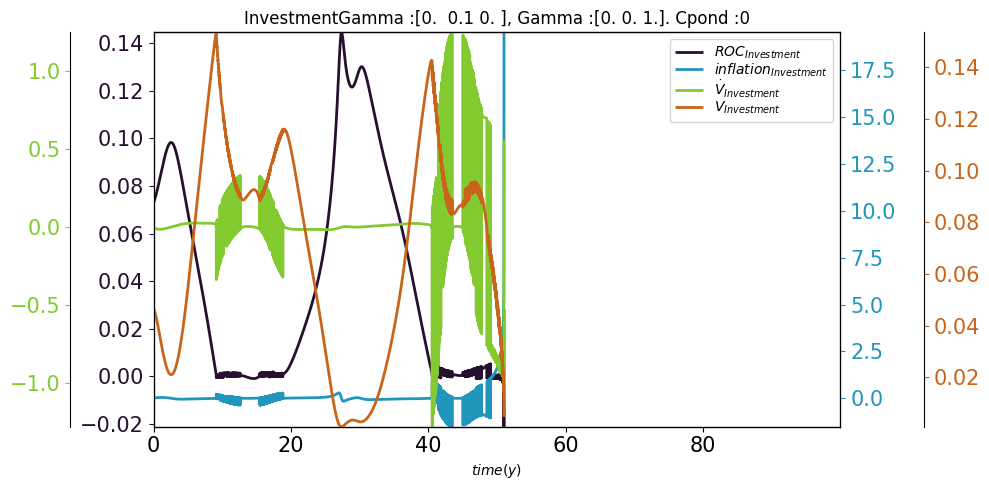

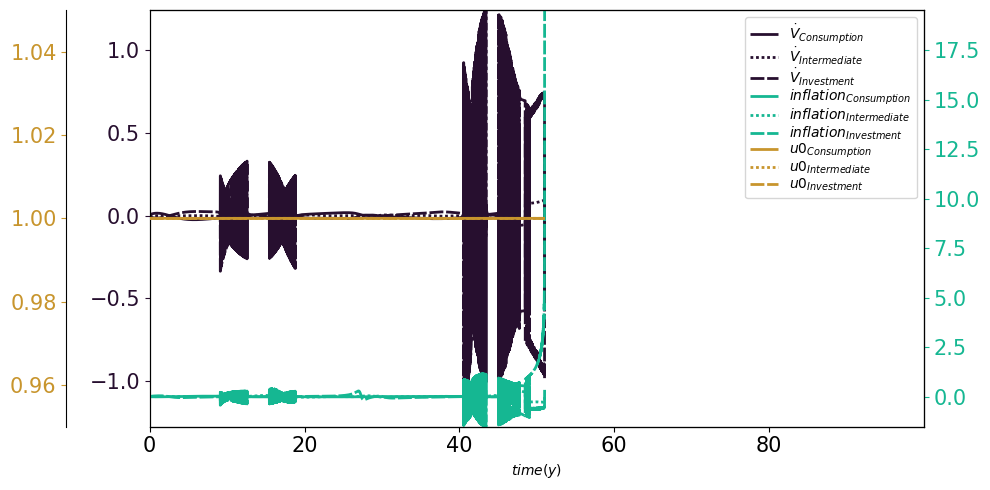

In [57]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption','Intermediate','Investment']
dparam0['Gamma']= np.array([[0. ,0.1,0],
                            [0. ,0.1,0],
                            [0. ,0.1,0]])
dparam0['Xi']   = np.array([[0. ,0. ,1],
                            [0. ,0. ,1],
                            [0. ,0. ,1]])
dparam0['Cpond'] = np.array([1,0,0])


########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)

dparam0['p']*=1.1
dparam0['employment']*=0.95
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']

########################################################
#              STABILISATION GOES HERE                 # 

#dparam0['u0']=0.9
#dparam0['N']*=.9
#dparam0['sigma']=10

dparam0['eta']=0.1
dparam0['mu0']=1.4

#dparam0['chiv']=0.1
dparam0['chiV']=0.1
#dparam0['chiY']=1
#
########################################################
# RUN AND PLOT 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 
hub.set_dparam('dt',0.01)

hub.run()

#%matplotlib inline
pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                          ])
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])

for i,sect in enumerate(dparam0['Nprod']):
    title = sect +f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','V']],title=title)#,tend=20)

#for sect in dparam0['Nprod']:
#    pgm.plots.XY(hub,['inflation',sect],['v',sect])

#hub.plot()
#hub.supplements['PiRepartition'](hub)
#hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
#pgm.plots.Sankey(hub)

#print([['employment',i] for i in hub.dparam['Nprod']['list']])
# Looking at employment variation
#pgm.plots.plotnyaxis(hub,y=[[['employment',i] for i in hub.dparam['Nprod']['list']]+['employmentAGG']])
pgm.plots.plotnyaxis(hub,y=[[['dotV',i] for i in hub.dparam['Nprod']['list']],
                            [['inflation',i] for i in hub.dparam['Nprod']['list']],
                            [['u0',i] for i in hub.dparam['Nprod']['list']]])


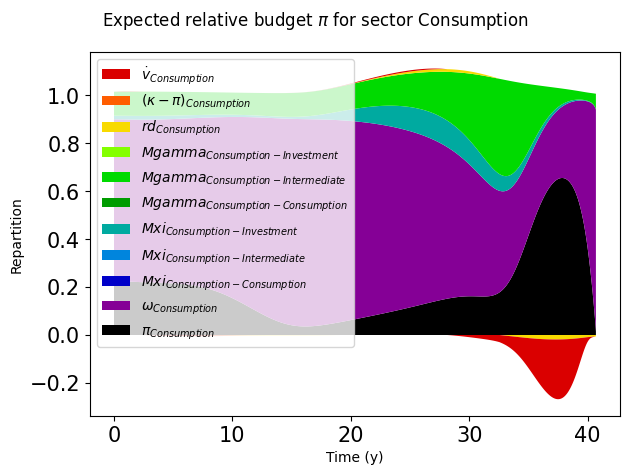

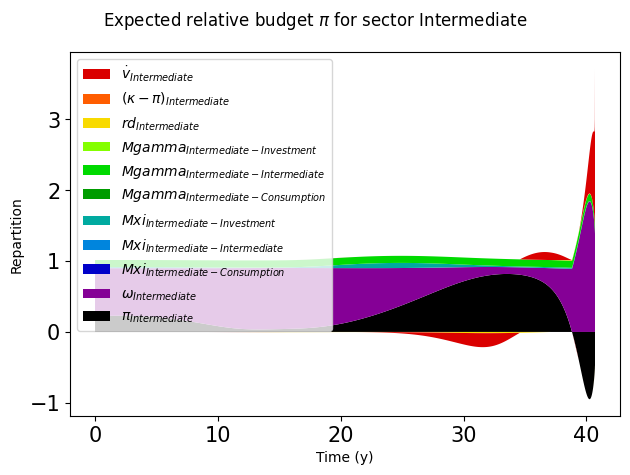

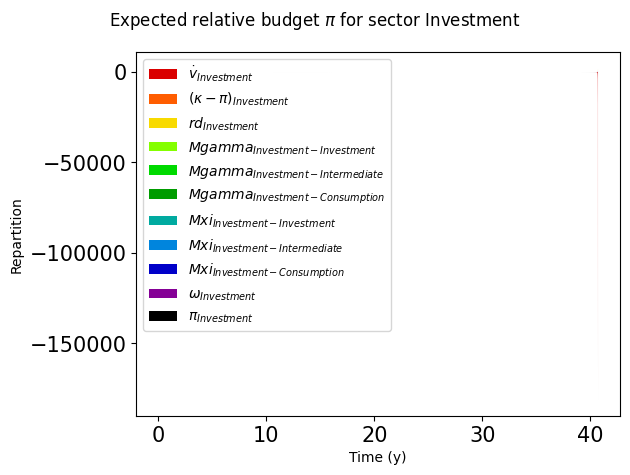

In [55]:
hub.supplements['PiRepartition'](hub)